An ad-hoc "bundle of linear models" in the style of [A Time Series Apologia](https://win-vector.com/2023/05/07/a-time-series-apologia/).

The fitting procedure here is a bit ad-hoc, but there are libraries that systematically deal with this as a nested regression.


In [1]:
# set up Python
import numpy as np
import pandas as pd
import plotnine
from plotnine import *

from nested_model_fns import plot_model_quality
from linear_bundle_fns import apply_linear_model_bundle_method

# set plot size
plotnine.options.figure_size = (16, 8)

In [2]:
modeling_lags = (1, 2, 3, 4)

In [3]:
d_train = pd.read_csv("d_train.csv")
d_test = pd.read_csv("d_test.csv")

In [4]:
d_test["linear model bundle (correct external regressor structure)"] = (
    apply_linear_model_bundle_method(
        modeling_lags=modeling_lags,
        durable_external_regressors=["x_durable_0"],
        transient_external_regressors=["x_transient_0"],
        d_train=d_train,
        d_apply=d_test,
    )
)

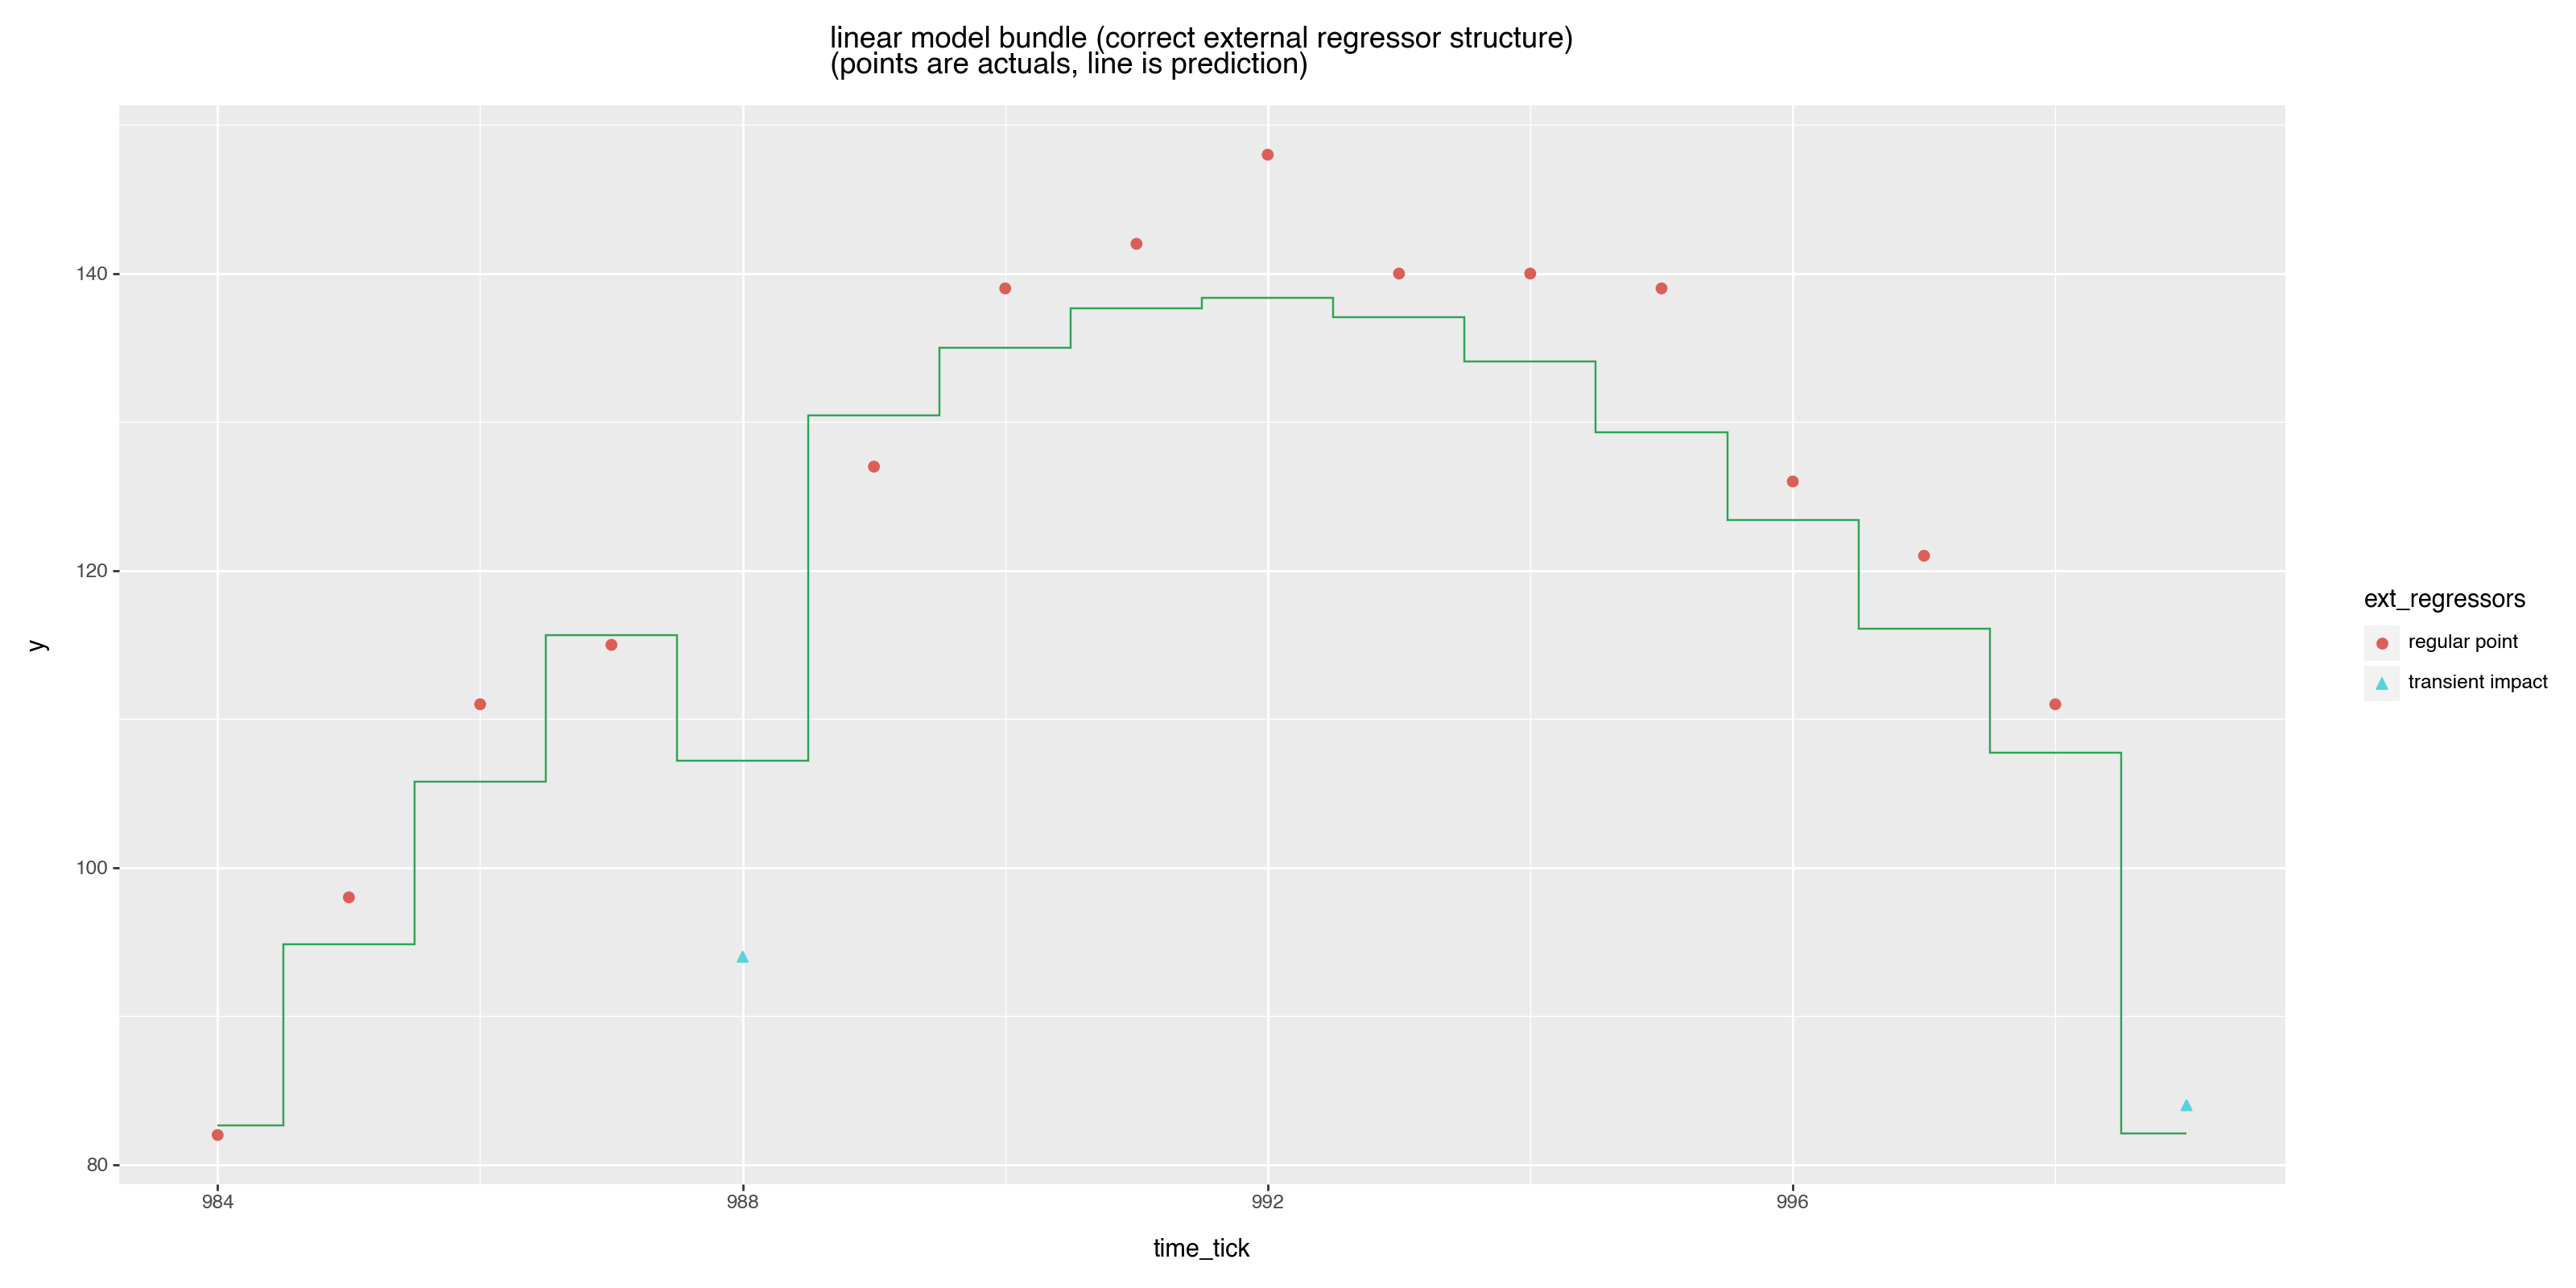

In [5]:
(
    ggplot(
        data=d_test.loc[d_test.notna().all(axis="columns"), :],
        mapping=aes(x="time_tick"),
    )
    + geom_point(aes(y="y", color="ext_regressors", shape="ext_regressors"), size=2)
    + geom_step(
        aes(y="linear model bundle (correct external regressor structure)"),
        color="#31a354",
        direction="mid",
    )
    + ggtitle(
        "linear model bundle (correct external regressor structure)\n(points are actuals, line is prediction)"
    )
)

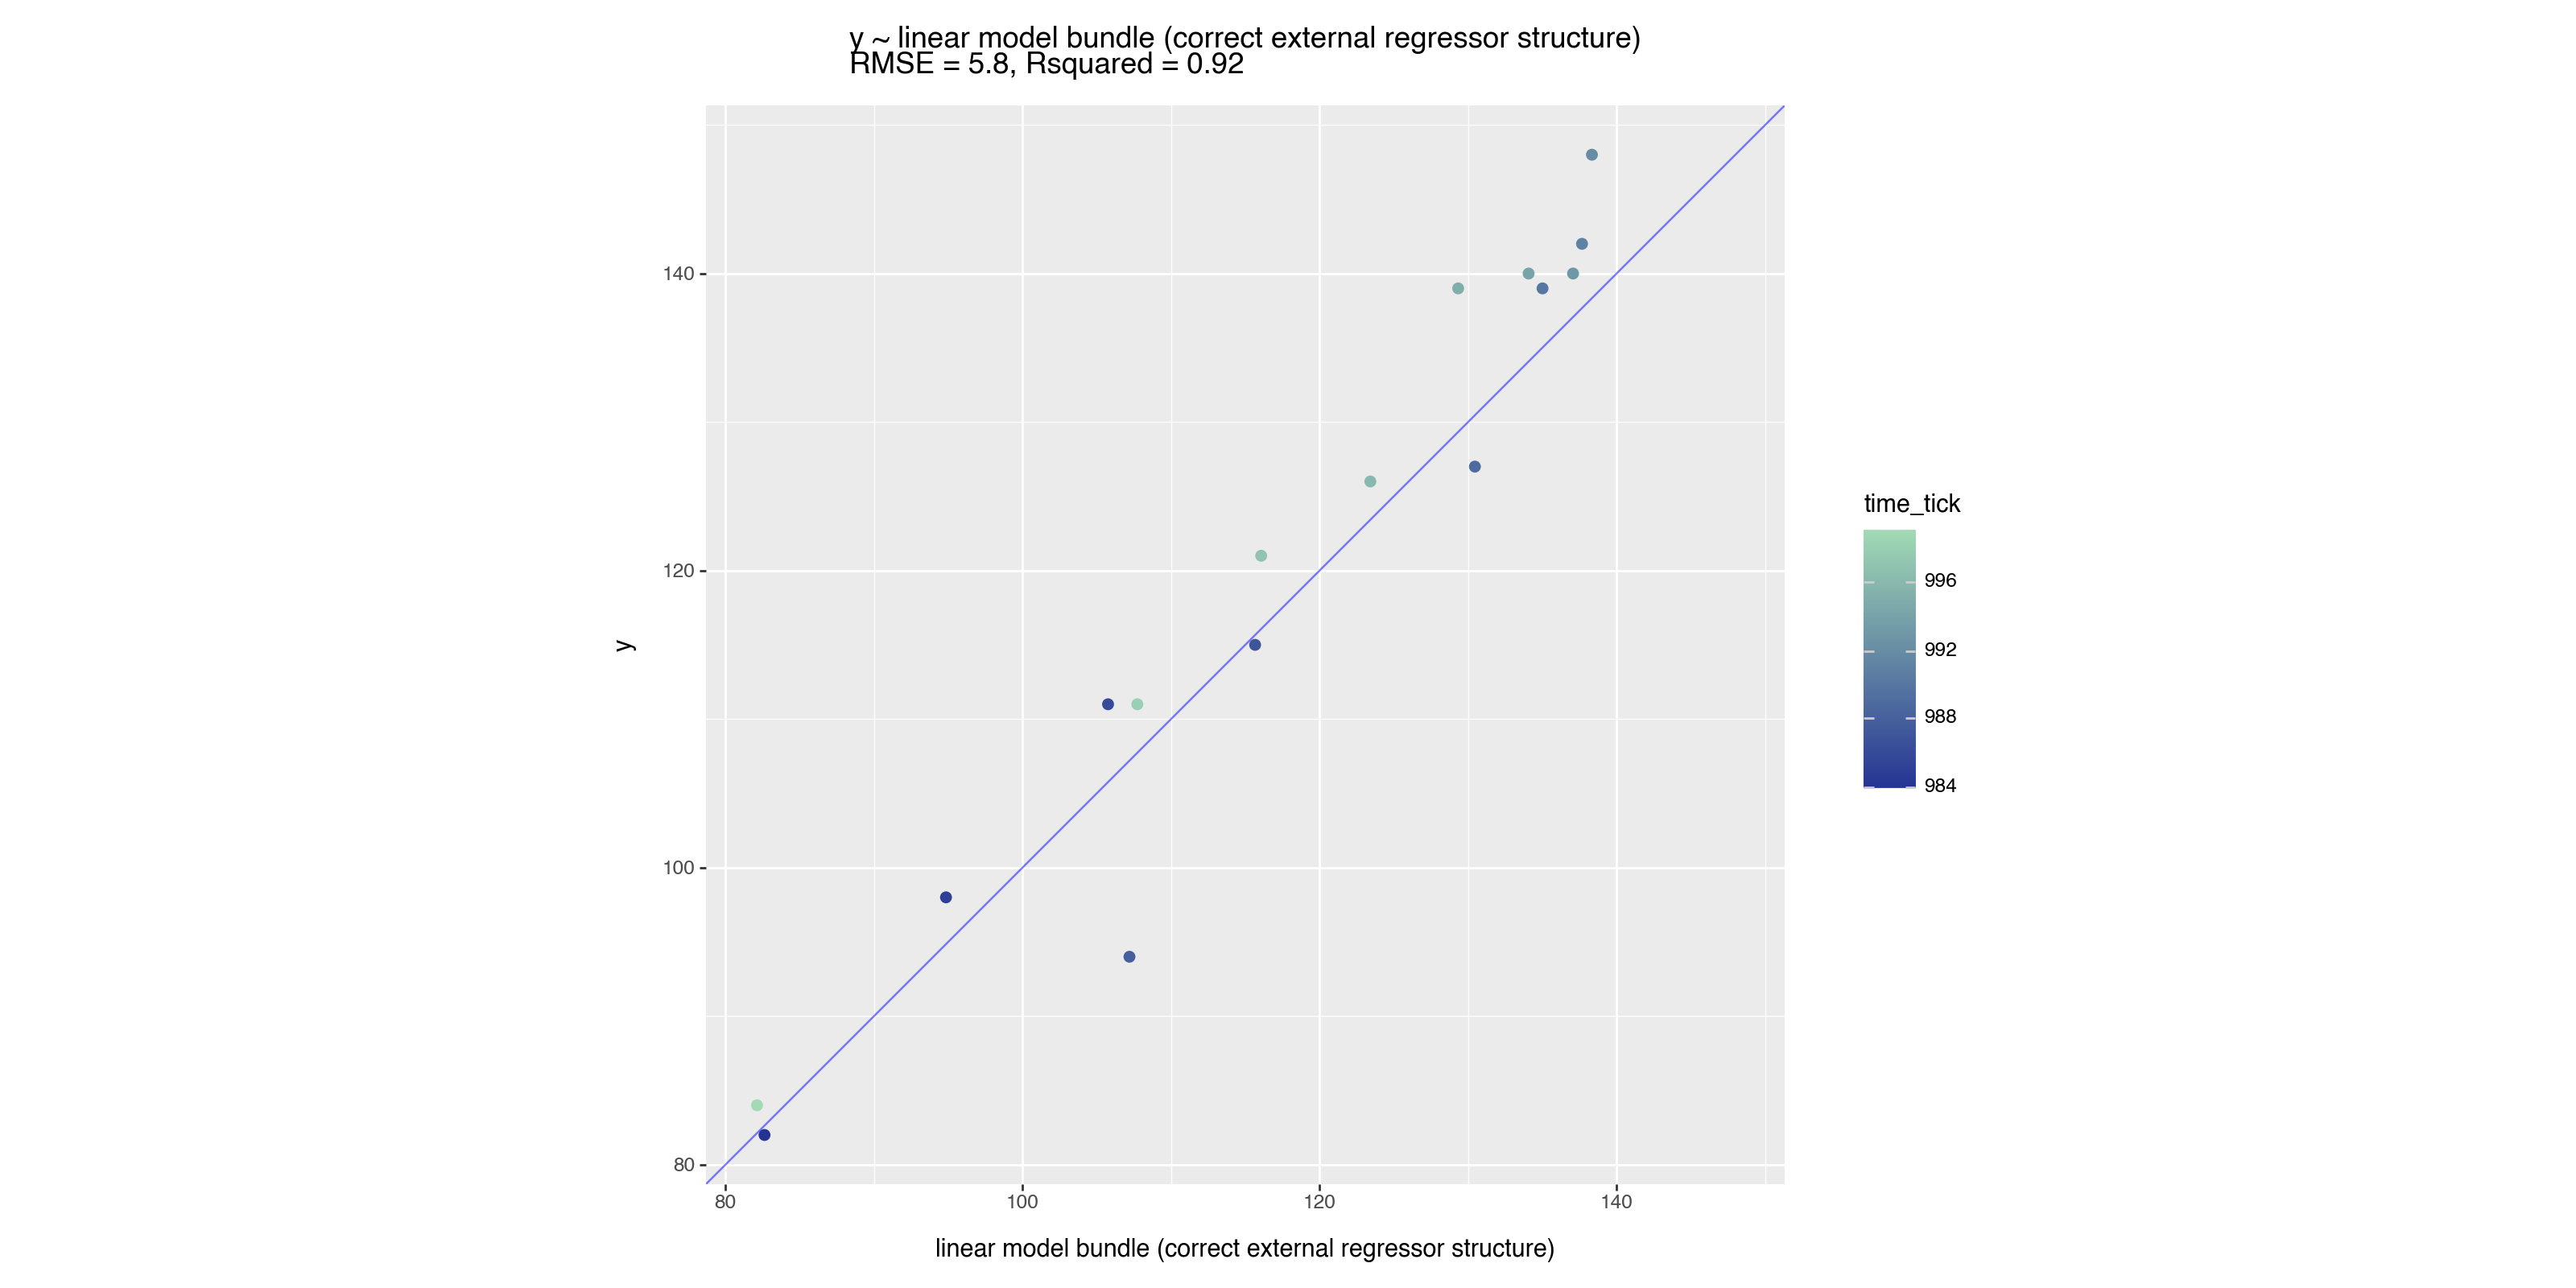

In [6]:
plot_model_quality(
    d_test.loc[
        pd.isnull(d_test["linear model bundle (correct external regressor structure)"])
        == False,
        :,
    ],
    result_name="linear model bundle (correct external regressor structure)",
)

This can be a usable result. The code to do this was a bit "one off", but it allows one to specify the desired external regressor effects in a way that may not be obvious when forced to adapt the modeling ask to standard packages.